# Working with Oklahoma Mesonet Time Series Data

Justin Richling

2019/04/29

## Goals for this notebook:
* Read in data from file
* Set variables to unique arrays
    * Work with potential bad data points
* Plot time series of different variables on same plot

### Quick look at the variable names as a reference
https://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/201904250000/mdf/HTML/metric/

### Each cell can act as a terminal, so we can list files as we do normally

In [5]:
cd ~/Desktop/

/Users/chowdahead/Desktop


In [6]:
ls *.mts

20190425nrmn.mts


## Import the libraries 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
ds = pd.read_fwf('20190425nrmn.mts')

In [9]:
ds.head()

,101 ! (c) 2019 Oklahoma,Climatological,Survey and,the Oklahoma Mesonet,-,all rights reserved,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,21 2019 04 25 00 00 00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STID STNM TIME RELH,TAIR WSPD,WVEC WDIR,WDSD WSSD WMAX,NaN,RAIN PRES SRAD,TA9M,WS2M,TS10,TB10,TS05,TS25,TS60,TR05,TR25,TR60
2,NRMN 121 0 79,16.3 1.6,1.6 168,7.1 0.4 2.4,NaN,0.76 968.81 123,16.4,1.1,17.0,16.8,17.6,16.2,15.2,1.45,1.43,1.47
3,NRMN 121 5 78,16.2 1.3,1.2 174,11.5 0.3 1.7,NaN,0.00 968.78 115,16.4,0.6,-995,-995,-995,-995,-995,-995,-995,-995
4,NRMN 121 10 78,16.2 1.0,1.0 170,15.8 0.2 1.5,NaN,0.00 968.79 104,16.4,0.2,-995,-995,-995,-995,-995,-995,-995,-995


In [10]:
ds = pd.read_fwf('20190425nrmn.mts',skiprows=2)

In [11]:
ds

,STID,STNM,TIME,RELH,TAIR,WSPD,WVEC,WDIR,WDSD,WSSD,...,TA9M,WS2M,TS10,TB10,TS05,TS25,TS60,TR05,TR25,TR60
0,NRMN,121,0,79,16.3,1.6,1.6,168,7.1,0.4,...,16.4,1.1,17.0,16.8,17.6,16.2,15.2,1.45,1.43,1.47
1,NRMN,121,5,78,16.2,1.3,1.2,174,11.5,0.3,...,16.4,0.6,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.00
2,NRMN,121,10,78,16.2,1.0,1.0,170,15.8,0.2,...,16.4,0.2,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.00
3,NRMN,121,15,79,16.2,1.1,1.0,160,14.7,0.3,...,16.4,0.1,17.0,16.8,17.6,16.2,15.3,-995.00,-995.00,-995.00
4,NRMN,121,20,80,16.2,2.0,2.0,147,5.6,0.3,...,16.3,1.5,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,NRMN,121,1415,-996,-996.0,-996.0,-996.0,-996,-996.0,-996.0,...,-996.0,-996.0,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.00
284,NRMN,121,1420,-996,-996.0,-996.0,-996.0,-996,-996.0,-996.0,...,-996.0,-996.0,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.00
285,NRMN,121,1425,-996,-996.0,-996.0,-996.0,-996,-996.0,-996.0,...,-996.0,-996.0,-996.0,-996.0,-996.0,-996.0,-996.0,-995.00,-995.00,-995.00
286,NRMN,121,1430,-996,-996.0,-996.0,-996.0,-996,-996.0,-996.0,...,-996.0,-996.0,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.00


### Panda data frames allow for easy data exploration and manipulation

#### We can explore the column variables
* refer back to https://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/201904250000/mdf/HTML/metric/ for long names

In [12]:
list(ds.columns)

['STID',
 'STNM',
 'TIME',
 'RELH',
 'TAIR',
 'WSPD',
 'WVEC',
 'WDIR',
 'WDSD',
 'WSSD',
 'WMAX',
 'RAIN',
 'PRES',
 'SRAD',
 'TA9M',
 'WS2M',
 'TS10',
 'TB10',
 'TS05',
 'TS25',
 'TS60',
 'TR05',
 'TR25',
 'TR60']

In [13]:
station = ds["STID"].copy()
station[0:2]

0    NRMN
1    NRMN
Name: STID, dtype: object

In [14]:
rh = ds['RELH'].copy()
temp = ds['TAIR'].copy()
ws = ds['WSPD'].copy()
wd = ds['WDIR'].copy()
press = ds['PRES'].copy()
rad = ds['SRAD'].copy()
time = ds['TIME'].copy()

In [19]:
type(ds['RELH']),type(rh)

(pandas.core.series.Series, pandas.core.series.Series)

In [10]:
# mask the bad values to zero
rad[rad<-100] = 0
print("radiation max:",rad.max())

# just run a quick scan of the data to see if it makes sense
print("Where radiation is above 300 W/m^s: \n",np.where(rad > 300))

press[press<-100] = 0
temp[temp<-100] = 0
ws[ws<-100] = 0
wd[wd<-100] = 0

radiation max: 1009
Where radiation is above 300 W/m^s: 
 (array([164, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 248, 249, 250, 251]),)


In [11]:
np.where(temp < -100)
# Nice, we caught all the erroneous values

(array([], dtype=int64),)

## Let's check out the <i>time</i> column and see what kind of intervals and range we have

In [12]:
print(time.shape)
print("Final time entry value:",time[287])

(288,)
Final time entry value: 1435


### Looks like 288 steps with the final value of 1435, which is 5 less than the total number of minutes in a 24-hr day (1440)
* 1435/288 = 5 minute intervals over a day
* Now we know a bit about the time variable, which will come in handy when plotting

## I just want to spend a couple of minutes extracting the UTC time out of our raw time data

The datetime package and function have the ability to take the interval and a starting datetime and give a new datetime for each of the data points in UTC time.

In [13]:
import datetime

# datetime format is (year,month,day,hour,minute) as integers
# timedelta will be our difference in time steps, 5 minutes in our case
print(datetime.datetime(2019,4,25,0,0)+datetime.timedelta(minutes=10))

2019-04-25 00:10:00


### Setting up a quick function to iterate over our array and calculate the new UTC time

In [14]:
def UTC_time(MIN):
    timez = datetime.datetime(2019,4,25,0,0)+datetime.timedelta(minutes=MIN)
    return '{0:%H:%M}'.format(timez)

In [15]:
print(UTC_time(int(time[0])))
print(UTC_time(int(time[287])))

00:00
23:55


### Fantastic, now we can make a quick function to make a new array of UTC times
* I had to make a list and then convert this to an array. I couldn't get the data into an array in one step
    * Probably an easy fix

In [16]:
Time = []
for i in range(0,288):
    UTC_time(i*5)
    Time.append(UTC_time(i*5))
Time = np.array(Time)    

# Let's focus on plotting...

## The time series plot of any variable is really just an x, y plot with time being the x-coordinate and the desired variable as the y-coordinate

In [17]:
x = Time[:]
y = rad[:]
y2 = press[:]

### Since we want to plot several variables on the same plot, we will need to set up a special axis from matplotlib

In [ ]:
# make an new axis
ax2 = ax1.twinx()

## Plot the data

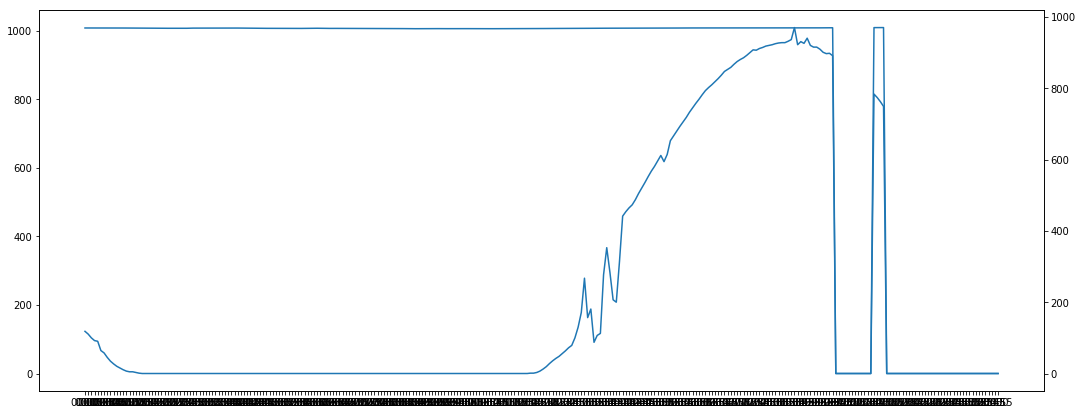

In [18]:
# set up a new figure
fig = plt.figure(figsize=(18,7))

# create a new axis object to plot on
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(x, y)
ax2.plot(x, y2)
plt.show()

## Sweet, we get a plot, although kind of an ugly one. Naturally we can play with the plotting settings to make <i>beautiful</i> and <i>informative</i> plots

#### First off, lets give our plot a quick title to inform what we're plotting
* The fontsize argument is literally jus that
* the "\n" line is just starting a new line

In [ ]:
plt.title("Oklahoma Mesonet Time Series Time Series"+
          "\nSolar Radaition and Pressure - 2019-04-25",fontsize=18)

#### We can change the color of the plots to distinguish between variables

In [ ]:
ax1.plot(x, y,color='orange') # solar radiation
ax2.plot(x, y2, color='purple') # pressure

#### We can also set the limits and range of the x and y-axes

In [ ]:
ax1.set_ylim([0,1100])  # set the values of the radiation
ax2.set_ylim([966,971])  # limit the plotting range of the pressures
ax1.set_xlim([0,288]) # set the values for the time

ax1.set_yticks(np.arange(0, 1200, 100)) # restrict the left y-axis 
ax2.set_yticks(np.arange(966, 971.5, .5)) # same as above for the right y-axis

ax1.set_xticks(np.arange(0, 288, 12)) # restrict the values to be every 12th, ie one hour
ax2.set_xticks(np.arange(0, 288, 12)) # same as above but to make sure both axes instances catch it

#### Sometimes gridlines also help infer values easier

In [ ]:
ax1.grid(True,linestyle='dashed',color='grey')

#### To make things more neat, the axes can be labeled and color matched to the variables
* the size argument is just the font size
* the labelpad argument moves the label around in relation to the axis

In [ ]:
ax1.set_ylabel('Irradiance ($W/m^2$)',size=18,color='orange') # $$ gives Tex formatting
ax2.set_ylabel('Pressure (hPa)',size=18,color='purple',labelpad=10)

## Now that the settings have been messed with a bit, let's add all these improvements to our script and plot it again:

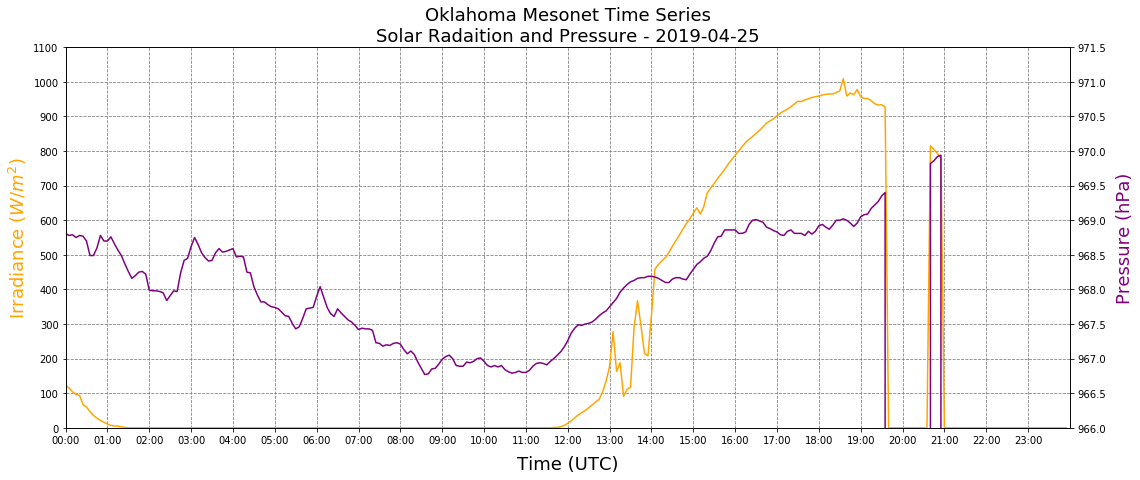

In [25]:
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(111)

##########################
# Set our variables
x = np.array(Time[:])
y = np.array(rad[:])
y2 = np.array(press[:])

##########################
# Set the plot title
plt.title("Oklahoma Mesonet Time Series"+
          "\nSolar Radaition and Pressure - 2019-04-25",fontsize=18)

##########################
# Plot the first variable, Solar Radiation, with orange color on the left y-axis
ax1.plot(x, y,color='orange')

# Label the left y-axis
ax1.set_ylabel('Irradiance $(W/m^2)$',size=18,color='orange') # $  $ gives Tex formatting

##########################
# Call a double-y plot
ax2 = ax1.twinx()

##########################
# Plot the second variable, Pressure, with purple color on the right y-axis
ax2.plot(x, y2, color='purple')

# Label the right y-axis
ax2.set_ylabel('Pressure (hPa)',size=18,color='purple',labelpad=10)

##########################
# Set the limits of any of our axes from either y-values
ax1.set_ylim([0,1100])  # set the values of the radiation
ax2.set_ylim([966,971.5])  # limit the plotting range of the pressures
ax1.set_xlim([0,288]) # set the values for the time

##########################
# We can play with the grid lines and ticks of the axes (either x or y) of any axes instance
# Make both the y-ticks be the same to clean it up nicely
ax1.grid(True,linestyle='dashed',color='grey')

ax1.set_yticks(np.arange(0, 1200, 100)) # restrict the values 
ax2.set_yticks(np.arange(966, 972, .5)) # same as above 

# Force the ticks on the x-axis to do a certain interval
ax1.set_xticks(np.arange(0, 288, 12)) # restrict the values to be every 12th, ie one hour
ax2.set_xticks(np.arange(0, 288, 12)) # same as above but to make sure both axes instances catch it

##########################
# Label our x-axis with the new UTC times
ax1.set_xlabel('Time (UTC)',size=18,labelpad=10)

# we can even color the axes themselves if we want
#for tl in ax2.get_yticklabels():
#    tl.set_color('r')

#plt.show()

##########################
# Finally, save the figure locally 
plt.savefig('rad_press.png',bbox_inches="tight") 
# bbox_inches="tight" cleans up the whitespace on saved image

## Let's also plot a time series of the temperature and relative humidity

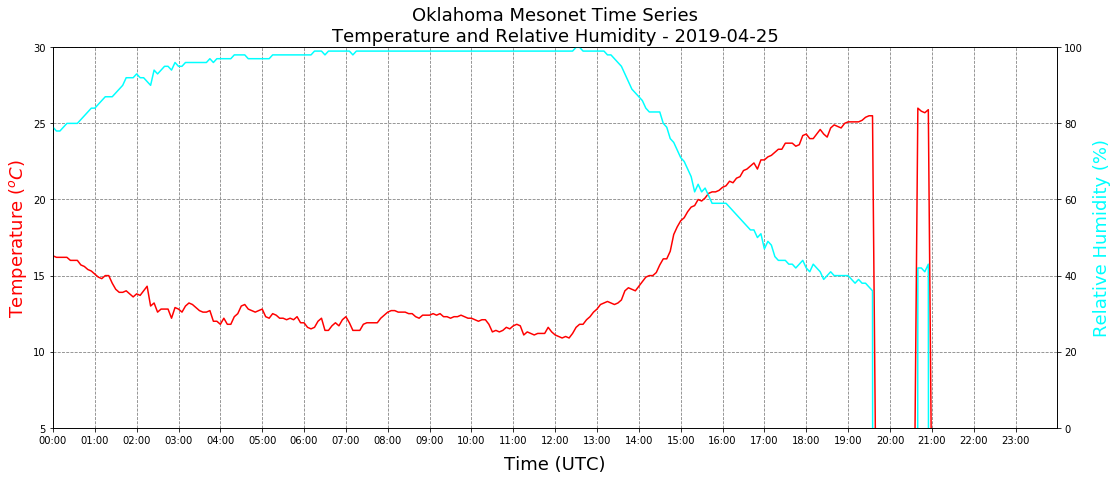

In [20]:
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(111)

x = np.array(Time[:])
y2 = np.array(rh[:])
y = np.array(temp[:])

plt.title('Oklahoma Mesonet Time Series'+
          "\nTemperature and Relative Humidity - 2019-04-25",fontsize=18)
#ax2.title.set_text('Pressure Time Series')

ax1.plot(x, y,'red')
ax1.set_ylabel('Temperature ($^o C$)',size=18,color='red')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'cyan')

ax2.set_ylim([0,100])
ax1.set_ylim([5,30])
ax1.set_yticks(np.arange(5, 35, 5)) # restrict the values 
ax2.set_yticks(np.arange(0, 120, 20)) # same as above 



ax2.set_ylabel('Relative Humidity (%)',size=18,color='cyan',labelpad=10)
ax1.set_xlabel('Time (UTC)',size=18,labelpad=10)
#for tl in ax2.get_yticklabels():
#    tl.set_color('r')
ax1.grid(True,linestyle='dashed',color='grey')


ax1.set_xlim([0,288])
ax1.set_xticks(np.arange(0, 288, 12))
ax2.set_xticks(np.arange(0, 288, 12))
#plt.show()
plt.savefig('temp_rh.png',bbox_inches="tight")

## For fun, let's plot wind speed and direction 

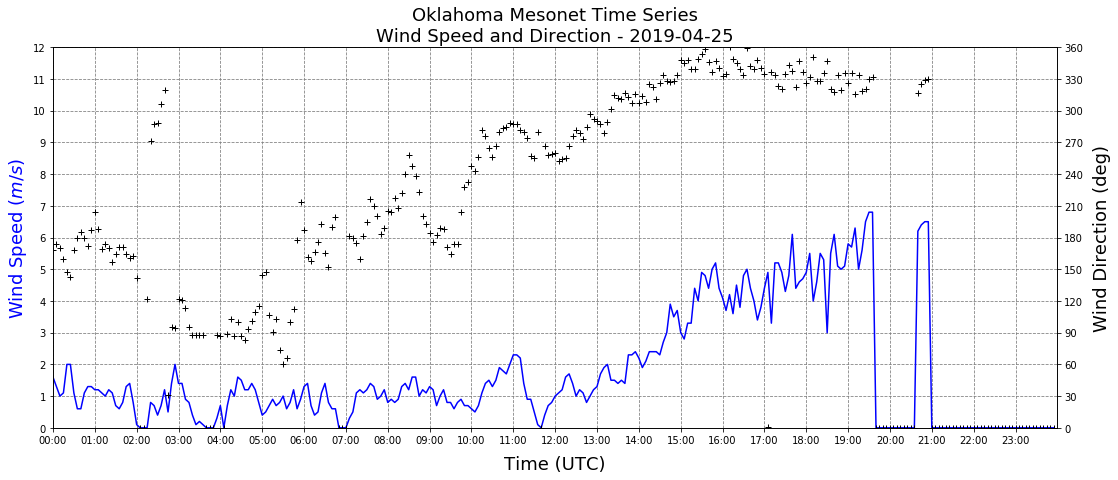

In [21]:
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(111)

##########################
# Set our variables
x = np.array(Time[:])
y = np.array(ws[:])
y2 = np.array(wd[:])

##########################
# Set the plot title
plt.title("Oklahoma Mesonet Time Series"+
          "\nWind Speed and Direction - 2019-04-25",fontsize=18)

##########################
# Plot the first variable, Wind Speed, with blue color on the left y-axis
ax1.plot(x, y,color='blue')

# Label the left y-axis
ax1.set_ylabel('Wind Speed ($m/s$)',size=18,color='blue') # $  $ gives Tex formatting

##########################
# Call a double-y plot
ax2 = ax1.twinx()

##########################
# Plot the second variable, Wind Direction, as +'s'
ax2.plot(x, y2,'k+')

# Label the right y-axis
ax2.set_ylabel('Wind Direction (deg)',size=18,color='black',labelpad=10)

##########################
# Set the limits of any of our axes from either y-values
ax1.set_ylim([0,12])  # set the values of the radiation
ax2.set_ylim([0,360])  # limit the plotting range of the pressures
ax1.set_xlim([0,288]) # set the values for the time

##########################
# We can play with the grid lines and ticks of the axes (either x or y) of any axes instance
# Make both the y-ticks be the same to clean it up nicely
ax1.grid(True,linestyle='dashed',color='grey')

##########################
# Force the ticks on the x-axis to do a certain interval
#plt.xticks(np.arange(0, 288, 12))
ax1.set_xticks(np.arange(0, 288, 12)) # restrict the values to be every 12th, ie one hour
ax2.set_xticks(np.arange(0, 288, 12)) # same as above but to make sure both axes instances catch it

ax1.set_yticks(np.arange(0, 13, 1)) # restrict the values 
ax2.set_yticks(np.arange(0, 361, 30)) # same as above 

##########################
# Label our x-axis with the new UTC times
ax1.set_xlabel('Time (UTC)',size=18,labelpad=10)

# we can even color the axes themselves if we want
#for tl in ax2.get_yticklabels():
#    tl.set_color('r')

#plt.show()

##########################
# Finally, save the figure locally 
plt.savefig('ws_wd.png',bbox_inches="tight") 
# bbox_inches="tight" cleans up the whitespace on saved image

# That's it!

## Things to consider further:
* Having the y-axes automatically generate same number of bins
    * This might be a heavy task, but probably achievable 
* Setting  all the font details ahead of time before plotting
* Adding cell hide/toggle function so the students can see the output but not the code (see code below)

In [22]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

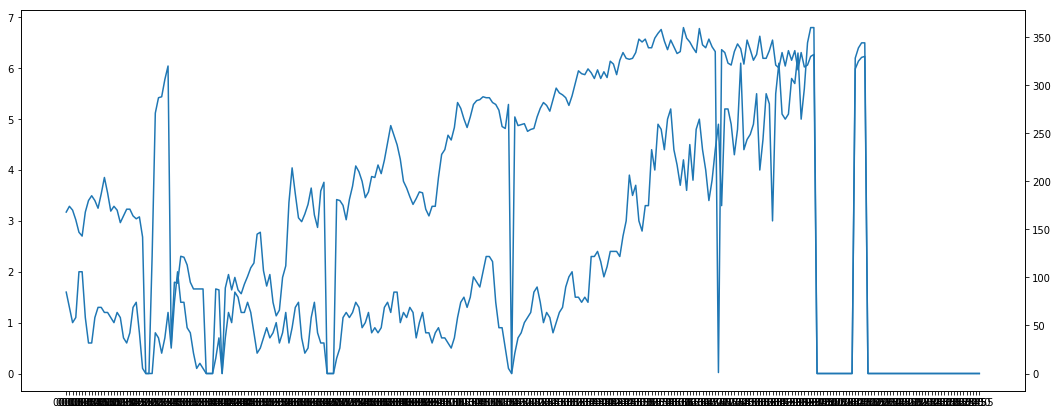

In [23]:
# set up a new figure
fig = plt.figure(figsize=(18,7))

# create a new axis object to plot on
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(x, y)
ax2.plot(x, y2)
plt.show()
hide_toggle()